# Utilisez des modèles supervisés non linéraires

## Classifiez vos données avec une SVM à noyau

[https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau]()



In [35]:
import numpy as np
# charger les données
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')

# créer la matrice de données
X = data[data.columns[:-1]].values

# créer le vecteur d'étiquettes
y = data['quality'].values

# transformer en un problème de classification binaire
y_class = np.where(y<6, 0, 1)

In [36]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class, test_size=0.3)


In [37]:
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [38]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=0.01)

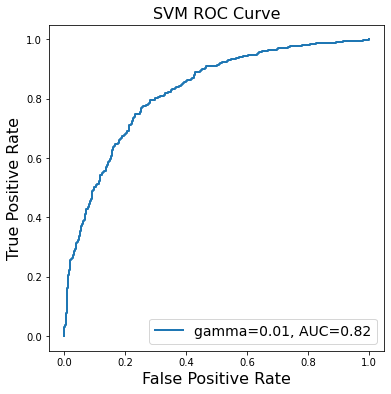

In [39]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [40]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
	param_grid, 
	cv=5, # 5 folds de validation croisée  
	scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.84


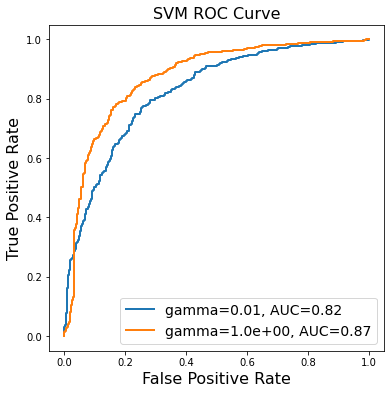

In [41]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

### Matrice de Gram

TODO : à revoir utilisation et comprehension de cette matrice

In [42]:
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=0.01)

In [43]:
kmatrix100 = kmatrix[:100, :100]

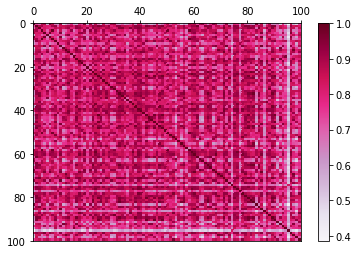

In [44]:
import matplotlib.pyplot as plt
import matplotlib
# dessiner la matrice
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd)

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

## Apprenez des etiquettes reelles avec une regression ridge à noyau

*kRR: kernel Ridge Regression*

[https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4729316-apprenez-des-etiquettes-reelles-avec-une-regression-ridge-a-noyau]()

In [45]:
# charger les données
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')

# créer la matrice de données
X = data[data.columns[:-1]].values

# créer le vecteur d'étiquettes
y = data['quality'].values

# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [46]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))


RMSE: 0.73


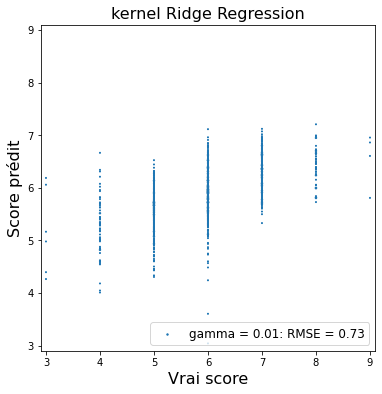

In [47]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

In [48]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))
